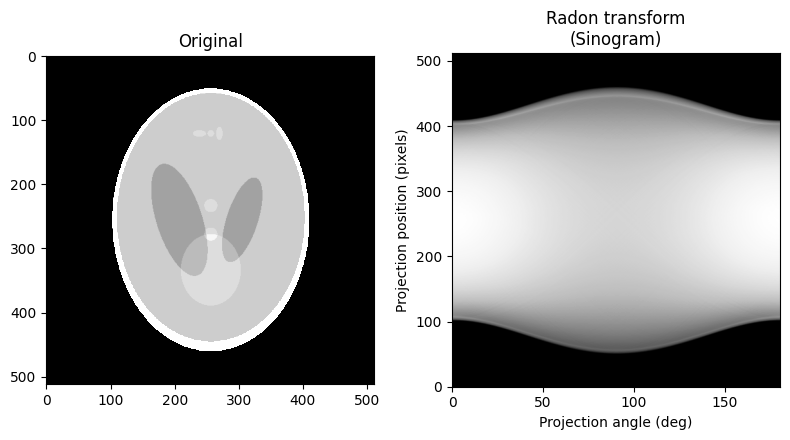

In [39]:
# Radon Transform - Forward Transform
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import radon, rescale

image = imread("shepp-logan.png", as_gray=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r, vmin=0.475, vmax=0.525)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

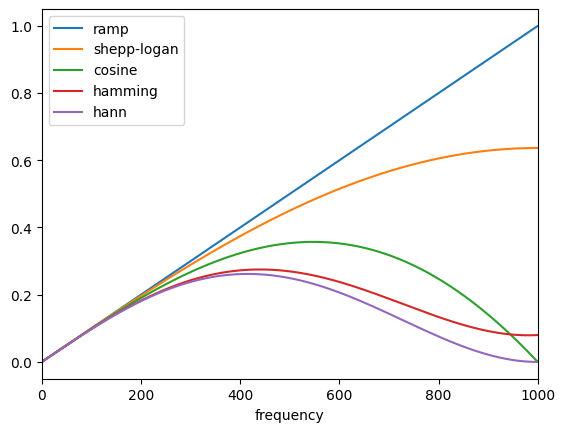

In [40]:
# Reconstruction with Filtered Back Projection (FBP) - Frequency Response Plot
import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()

Time Taken in Milliseconds: 2747
FBP rms reconstruction error: 0.0219


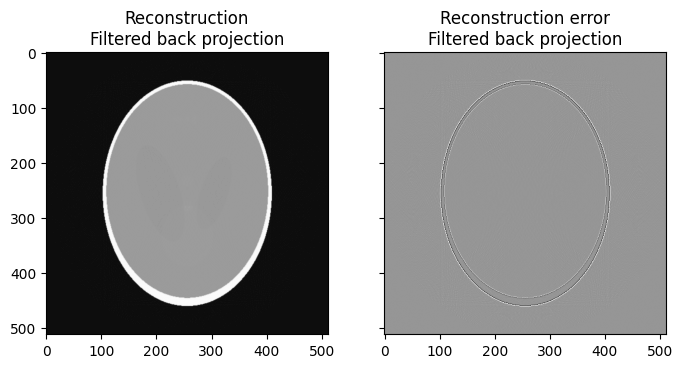

In [41]:
# Reconstruction with Filtered Back Projection (FBP) - Inverse Transform with 'ramp filter
from skimage.transform import iradon
import time

start_time = int(round(time.time() * 1000))
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
elapsed_time = int(round(time.time() * 1000)) - start_time
print(f"Time Taken in Milliseconds: {elapsed_time}")

error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

Time Taken in Milliseconds (Iteration 1): 9733
SART (1 iteration) rms reconstruction error: 0.0265
Time Taken in Milliseconds (Iteration 2): 19194
SART (2 iterations) rms reconstruction error: 0.0215
Time Taken in Milliseconds (Iteration 3): 19194
SART (3 iterations) rms reconstruction error: 0.0193
Time Taken in Milliseconds (Iteration 4): 19194
SART (4 iterations) rms reconstruction error: 0.018


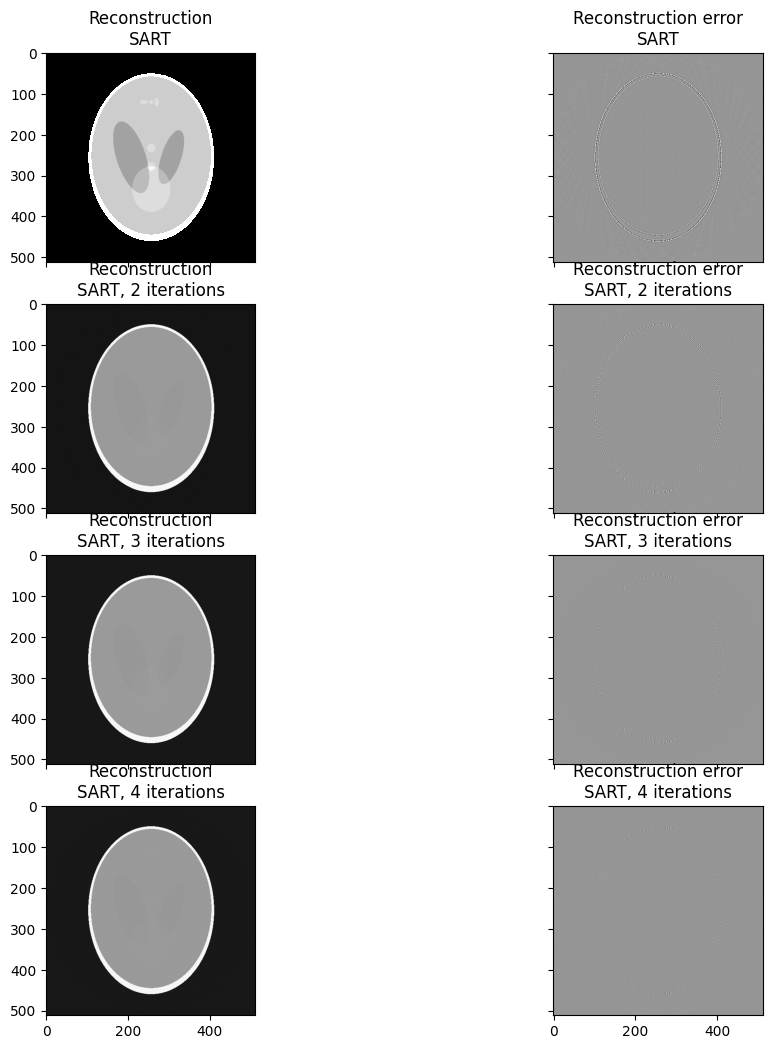

In [46]:
# Reconstruction with Simultaneous Algebraic Reconstruction Technique
from skimage.transform import iradon_sart

start_time = int(round(time.time() * 1000))
reconstruction_sart = iradon_sart(sinogram, theta=theta)
elapsed_time = int(round(time.time() * 1000)) - start_time
print(f"Time Taken in Milliseconds (Iteration 1): {elapsed_time}")

error = reconstruction_sart - image
print(f'SART (1 iteration) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')

# Original
# fig, axes = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=True)

#Increased Size
fig, axes = plt.subplots(4, 2, figsize=(12, 12.5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART")
ax[0].imshow(image, cmap=plt.cm.Greys_r, vmin=0.475, vmax=0.525)

ax[1].set_title("Reconstruction error\nSART")
ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r, **imkwargs)

# 2nd Iteration
start_time2 = int(round(time.time() * 1000))
reconstruction_sart2 = iradon_sart(sinogram, theta=theta, image=reconstruction_sart)
elapsed_time2 = int(round(time.time() * 1000)) - start_time
print(f"Time Taken in Milliseconds (Iteration 2): {elapsed_time2}")


error = reconstruction_sart2 - image
print(f'SART (2 iterations) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')

ax[2].set_title("Reconstruction\nSART, 2 iterations")
ax[2].imshow(reconstruction_sart2, cmap=plt.cm.Greys_r)

ax[3].set_title("Reconstruction error\nSART, 2 iterations")
ax[3].imshow(reconstruction_sart2 - image, cmap=plt.cm.Greys_r, **imkwargs)

# 3rd Iteration of SART
start_time3 = int(round(time.time() * 1000))
reconstruction_sart3 = iradon_sart(sinogram, theta=theta, image=reconstruction_sart2)
elapsed_time3 = int(round(time.time() * 1000)) - start_time
print(f"Time Taken in Milliseconds (Iteration 3): {elapsed_time2}")

error = reconstruction_sart3 - image
print(f'SART (3 iterations) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')

ax[4].set_title("Reconstruction\nSART, 3 iterations")
ax[4].imshow(reconstruction_sart3, cmap=plt.cm.Greys_r)

ax[5].set_title("Reconstruction error\nSART, 3 iterations")
ax[5].imshow(reconstruction_sart3 - image, cmap=plt.cm.Greys_r, **imkwargs)

# 4th Iteration of SART
start_time4 = int(round(time.time() * 1000))
reconstruction_sart4 = iradon_sart(sinogram, theta=theta, image=reconstruction_sart3)
elapsed_time4 = int(round(time.time() * 1000)) - start_time
print(f"Time Taken in Milliseconds (Iteration 4): {elapsed_time2}")

error = reconstruction_sart4 - image
print(f'SART (4 iterations) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')

ax[6].set_title("Reconstruction\nSART, 4 iterations")
ax[6].imshow(reconstruction_sart4, cmap=plt.cm.Greys_r)

ax[7].set_title("Reconstruction error\nSART, 4 iterations")
ax[7].imshow(reconstruction_sart4 - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()